# Multinomial and Ordinal Logistic Regression

The notebook on Logistic Regression covered the case with two categories or **Binary Logistic Regression**  

This notebook expands on cases where there are multiple categories and the response variable has multiple **nominal** or **ordinal** values.


## Levels of Measurement (Scales of Data)

In statistics and data science, variables can be classified into **four levels of measurement**, based on the properties they possess:

| Level of Measurement | Description                                                   | Examples                            | Arithmetic Operations Allowed | 
|:--------------------|:--------------------------------------------------------------|:------------------------------------|:------------------------------|
| **Nominal**           | Categories with **no order**; purely labels or names            | Gender, Colors, Product Type        | None                          | 
| **Ordinal**           | Categories with a **meaningful order**, but unknown or unequal spacing | Credit Rating, Satisfaction Level   | Comparison (\(<, >\))         | 
| **Interval**          | Ordered numeric values with **equal intervals**, but no true zero | Temperature (°C, °F), Dates         | +, −, comparison              | 
| **Ratio**             | Ordered numeric values with **equal intervals and a true zero** | Height, Weight, Age, Income         | +, −, ×, ÷, comparison        |  


### Categorical Models

The focus of this notebook will be on the multi-class categorical models for **nominal** and **ordinal** measurements.  


### Binary Logistic Regression  

Recall that in the binary case where there are only two categories $ y \in \{0, 1\} $:

$$
P(y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p)}}
$$

and the Log-likelihood:

$$
\ell(\beta) = \sum_{i=1}^n \left[ y_i \ln(p_i) + (1 - y_i) \ln(1 - p_i) \right]
$$

---

### Multinomial Logistic Regression (Softmax)  

Suppose the response variable $Y$ takes values in the set of categories

$$
Y \in \{1, 2, \ldots, K\}
$$

For each category $j = 1, 2, \ldots, K - 1$, we use a different parameter vector $\boldsymbol{\beta}^{(j)} \in \mathbb{R}^{p+1}$, and impose the log-odds $\ln \frac{\pi_j}{\pi_K}$ to be linear.    


$\ln \frac{\pi_j}{\pi_K} = \mathbf{x}^{\top} \beta^{(j)} = \beta^{(j)}_0 + \beta^{(j)}_1 x_1 + \cdots + \beta^{(j)}_p x_p$

where 

$P(Y = j \mid \mathbf{x}) = \pi_j = \pi_K \ e^{x^{\top} \beta^{(j)}} \propto e^{x^{\top} \beta^{(j)}}$

subject to the constraint $\sum_{i=1}^K \pi_i = 1$ which yields  

$$
\pi_j = \dfrac{e^{x^{\top} \beta^{(j)}}}{\sum_{i = 1}^{K} e^{x^{\top} \beta^{(i)}}} \ , \quad j = 1, 2, \dots, K - 1, K
$$






$$
P(y = k \mid X) = \dfrac{e^{(\beta_{k0} + \beta_{k1} x_1 + \dots + \beta_{kp} x_p)}}{\sum_{j=1}^K e^{(\beta_{j0} + \beta_{j1} x_1 + \dots + \beta_{jp} x_p)}}
$$

Log-likelihood:

$$
\ell(\beta) = \sum_{i=1}^n \sum_{k=1}^K I(y_i = k) \ln P(y_i = k \mid X_i)
$$

Where $I(y_i = k)$ is an indicator function equal to $1$ if observation $i$ belongs to class $k$, and $0$ otherwise.

---


### Ordinal Logistic Regression

Instead of modeling the probability of being in one category directly, it models the **cumulative probability** of being in category *j* or below:

$$
\log \left( \frac{P(y \leq j)}{P(y > j)} \right) = \theta_j - \beta^\top X
$$

Where:
- $\theta_j$ is a **threshold** specific to category *j*
- $\beta$ is the set of coefficients for predictors (same for all thresholds)
- Assumes the **proportional odds assumption**: the effect of predictors is constant across the different cumulative logits

---



## 📌 When to Use  

✅ Use **ordinal logistic regression** when:
- The target variable has **ordered, discrete categories**
- You want to maintain the order information
- The proportional odds assumption holds (can be tested)

---



## 📦 Can You Do This in Python?

Yes — though **scikit-learn doesn’t have built-in ordinal logistic regression**.  
You can use:
- 📦 `statsmodels.miscmodels.ordinal_model.OrdinalModel`
- 📦 `mord` package (`pip install mord`) — an efficient implementation of ordinal logistic regression models

---

✅ *A great option for credit scoring, customer satisfaction levels, risk rating grades, or any scenario where the outcome has a clear order but the spacing between outcomes isn’t strictly numeric.*



### Pros and Cons  

| Pros                                                                                      | Cons                                                                                      |
|:------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------|
| Simple to implement and interpret                                                     | Assumes linear relationship between predictors and log-odds                               |
| Provides interpretable coefficients (as odds ratios)                                   | Sensitive to multicollinearity                                                            |
| Fast to train, even on large datasets                                                 | Can underperform with complex, nonlinear relationships                                    |
| Probabilistic predictions — gives class probabilities, not just labels                | Assumes independence of irrelevant alternatives (IIA) in the multinomial case             |
| Supports regularization (Ridge/Lasso/ElasticNet)                                      | Performance can degrade if predictors have very different scales (scaling usually needed) |
| Well-understood statistical properties and asymptotics                                | May not perform well with highly imbalanced datasets without adjustment                   |

---


### When to Use  

✅ Use **Binary Logistic Regression** when:
- The outcome is **binary** (two classes)
- You need **interpretable coefficients**
- You care about **probabilities** for decision-making
- The relationship between predictors and outcome is reasonably **linear in the log-odds**

✅ Use **Multinomial Logistic Regression** when:
- The outcome has **more than two unordered categories**
- The categories are **mutually exclusive**
- You need to interpret how predictors influence the probability of choosing one class over others
- Simpler tree-based models (like decision trees or random forests) aren’t offering enough interpretability or are overfitting

---


## Alternatives  

If logistic regression performance or assumptions are limiting:
- **Decision Trees / Random Forests / Gradient Boosting**
- **Support Vector Machines (SVM)**
- **Naive Bayes**
- **Neural Networks (for highly nonlinear, high-dimensional data)**

---


In [1]:
from sklearn.datasets import fetch_california_housing

# Import California Housing Data
data = fetch_california_housing()

# Print description of dataset
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import mord
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create features and targets
X = data.data
y_continuous = data.target

In [3]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


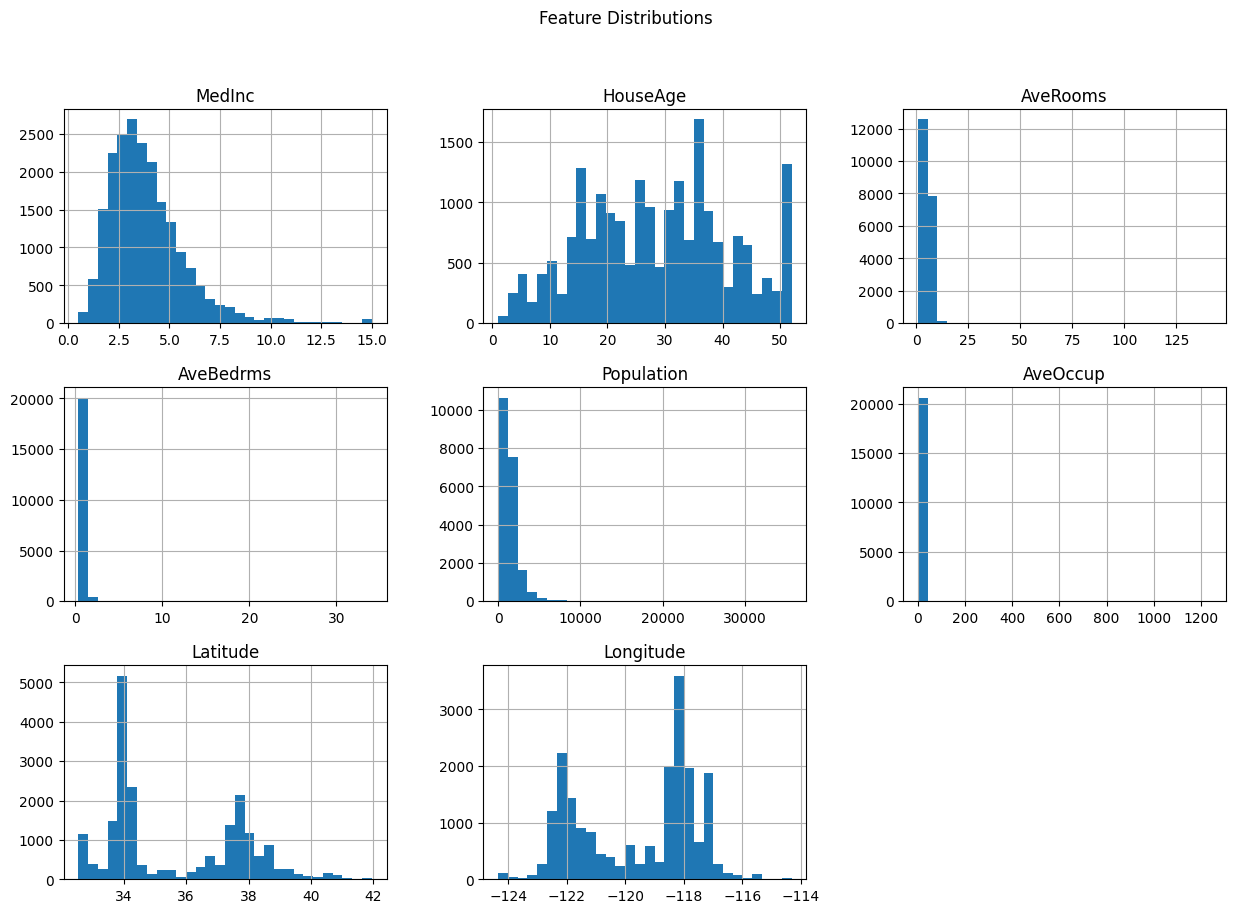

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

df.hist(bins=30, figsize=(15,10))
plt.suptitle('Feature Distributions')
plt.show()


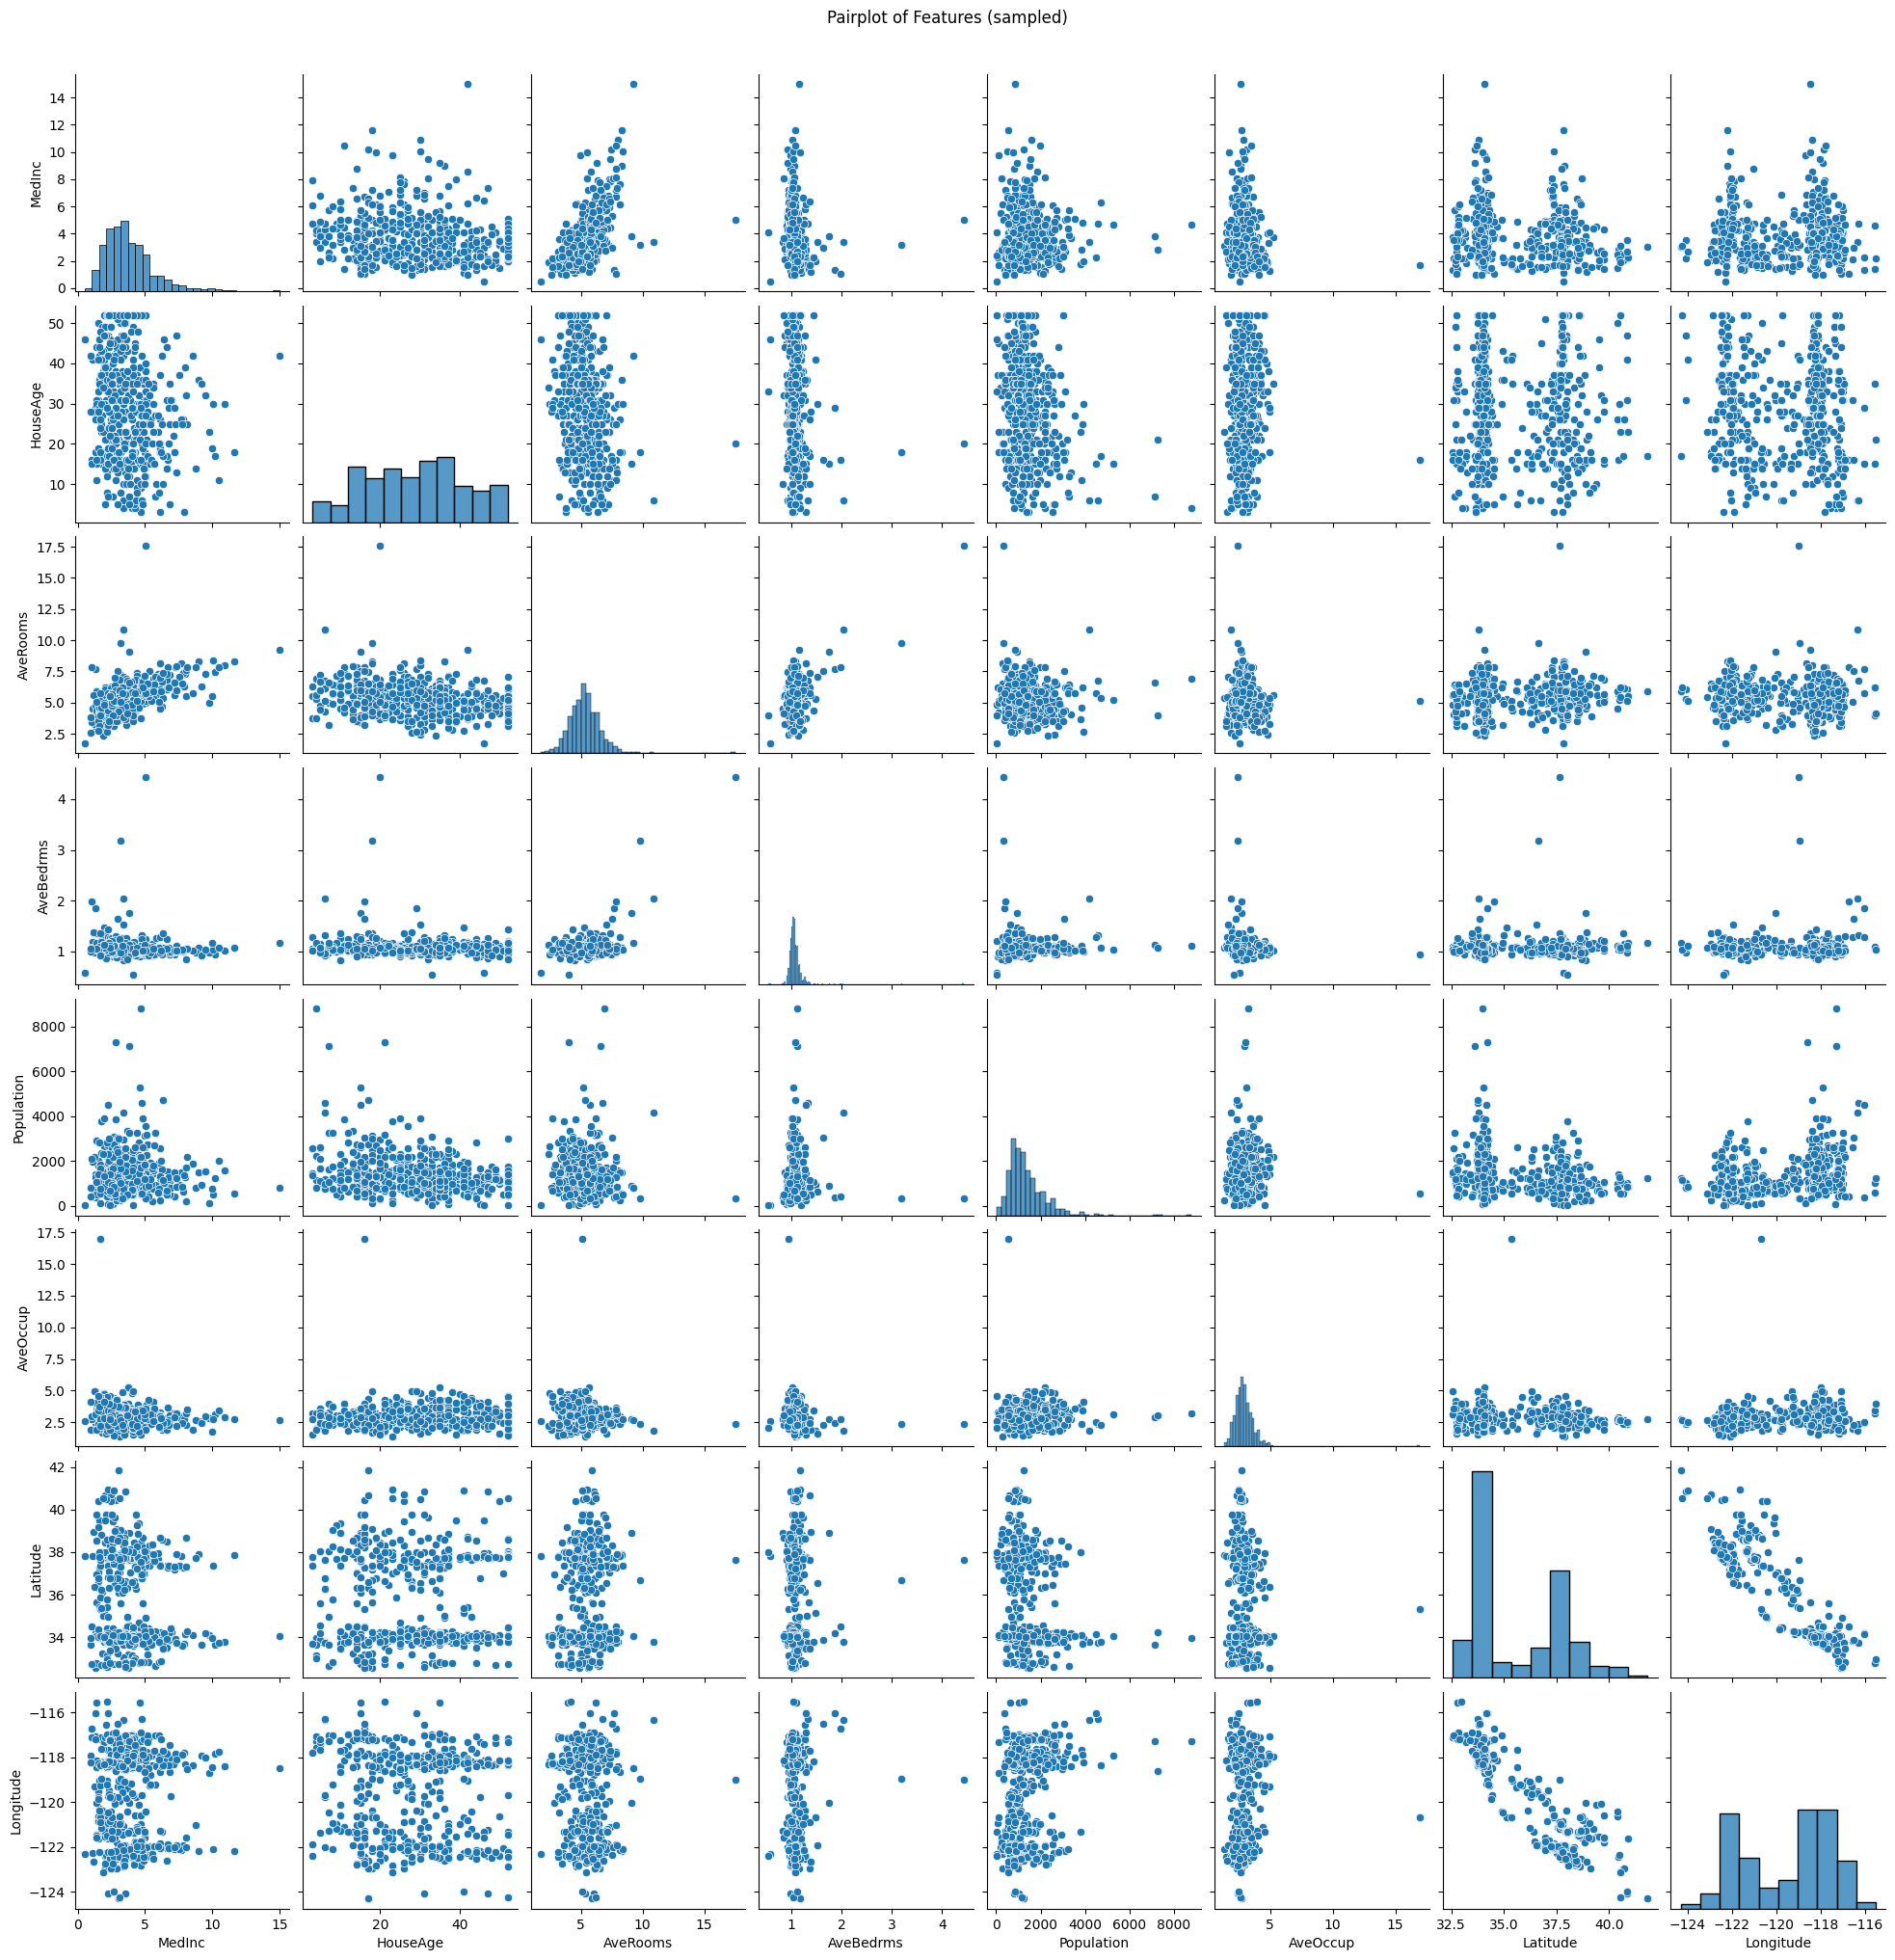

In [5]:
sns.pairplot(df.sample(500))  # Sample 500 rows to keep it fast
plt.suptitle('Pairplot of Features (sampled)', y=1.02)
plt.show()


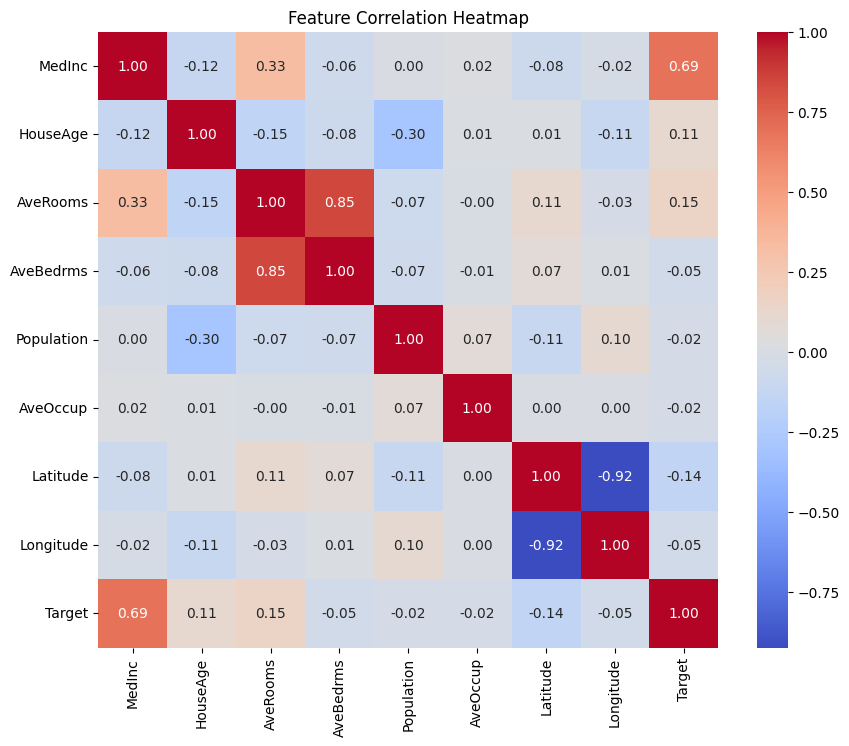

In [6]:
df['Target'] = data.target
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


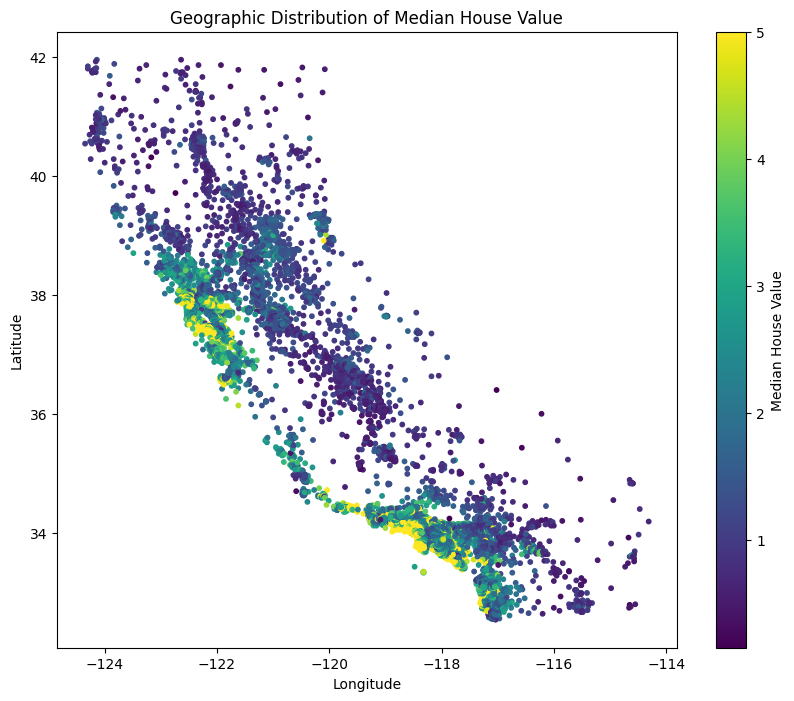

In [7]:
plt.figure(figsize=(10,8))
sc = plt.scatter(data.data[:, 7], data.data[:, 6], c=data.target, cmap='viridis', s=10)
plt.colorbar(sc, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Median House Value')
plt.show()


In [8]:
# Bin target into 3 ordinal categories: Low=0, Medium=1, High=2
y_ordinal = pd.qcut(y_continuous, q=3, labels=[0,1,2]).astype(int)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_ordinal, test_size=0.3, random_state=42)


In [9]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [10]:
# Initialize and fit ordinal logistic regression (LogisticAT = All Threshold)
model = mord.LogisticAT()
model.fit(X_train_scaled, y_train)


LogisticAT()

In [11]:
# Predict on test set
y_pred = model.predict(X_test_scaled)


In [12]:
# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2061
           1       0.55      0.70      0.61      2049
           2       0.80      0.69      0.74      2082

    accuracy                           0.70      6192
   macro avg       0.72      0.70      0.71      6192
weighted avg       0.72      0.70      0.71      6192



In [13]:
# Original continuous target
y_continuous = data.target

# Create bins (the same way you did)
bins = pd.qcut(y_continuous, q=3, retbins=True)[1]
print("Bin edges for median house value:")
print(bins)

Bin edges for median house value:
[0.14999    1.414      2.30333333 5.00001   ]


In [14]:
categories = ['Low', 'Medium', 'High']
bin_ranges = [f"${bins[i]:.2f} - ${bins[i+1]:.2f}" for i in range(len(bins)-1)]

summary_df = pd.DataFrame({
    'Category': categories,
    'Value Range': bin_ranges
})
print(summary_df)

  Category    Value Range
0      Low  $0.15 - $1.41
1   Medium  $1.41 - $2.30
2     High  $2.30 - $5.00


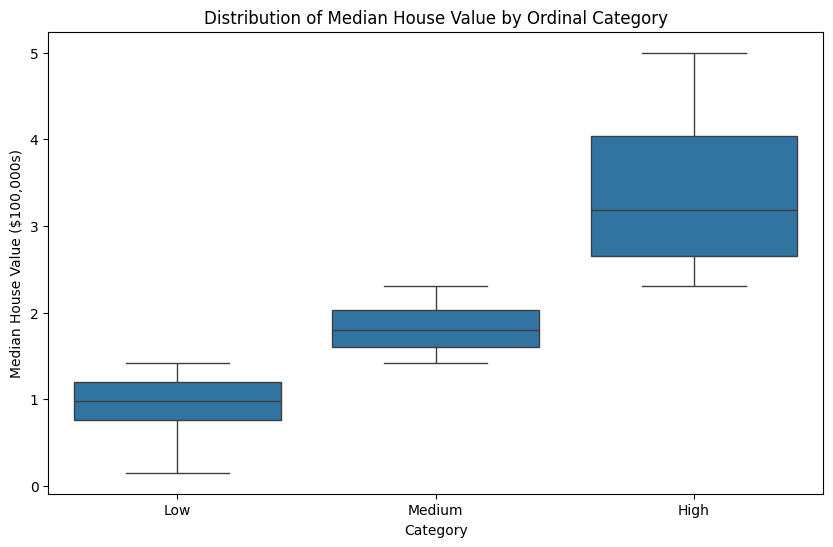

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your ordinal target variable
y_ordinal = pd.qcut(y_continuous, q=3, labels=[0,1,2]).astype(int)

df_viz = pd.DataFrame({'MedianHouseValue': y_continuous, 'Category': y_ordinal})

plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='MedianHouseValue', data=df_viz)
plt.xticks([0,1,2], ['Low', 'Medium', 'High'])
plt.title('Distribution of Median House Value by Ordinal Category')
plt.ylabel('Median House Value ($100,000s)')
plt.xlabel('Category')
plt.show()


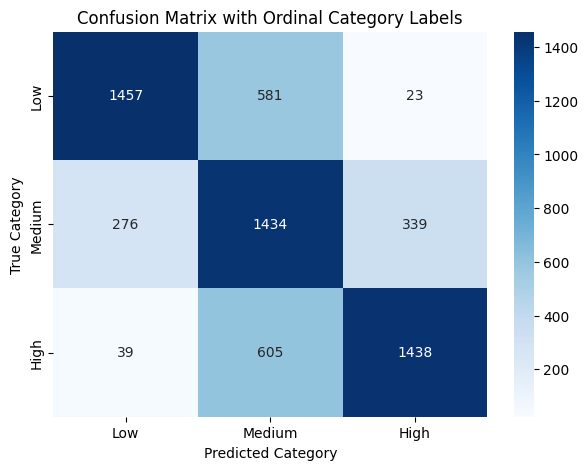

In [16]:
# Assuming y_test and y_pred are your true and predicted ordinal labels

cm = confusion_matrix(y_test, y_pred)

category_names = ['Low', 'Medium', 'High']

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=category_names,
            yticklabels=category_names)

plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.title('Confusion Matrix with Ordinal Category Labels')
plt.show()

In [17]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names  # ['class_0', 'class_1', 'class_2']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train_scaled, y_train)

# Predict on test
y_pred = model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names))



              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



/Users/michaeladdington/Desktop/quant_finance/quant_finance_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


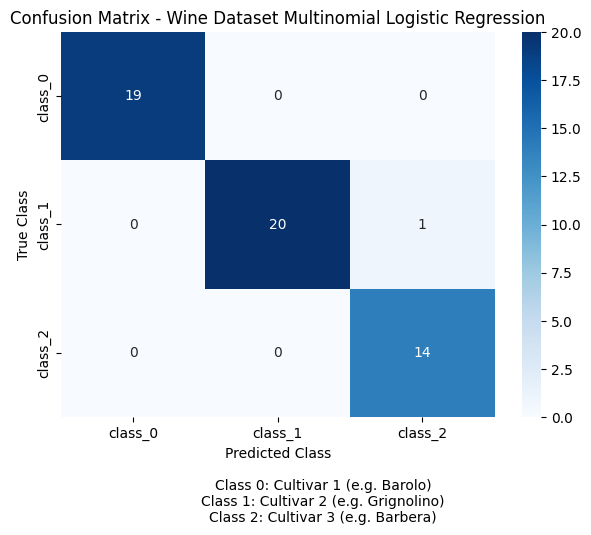

In [18]:
import matplotlib.pyplot as plt


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Wine Dataset Multinomial Logistic Regression')

# Add explicit class mapping below the plot
class_mapping = "\n".join([
    "Class 0: Cultivar 1 (e.g. Barolo)",
    "Class 1: Cultivar 2 (e.g. Grignolino)",
    "Class 2: Cultivar 3 (e.g. Barbera)"
])

plt.gcf().text(0.5, -0.1, class_mapping, ha='center', fontsize=10)
plt.show()
